In [305]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import scipy.special as sc
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import math
import csv
from scipy.interpolate import interp1d
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from scipy import stats

In [306]:
investimentiSvizzeri=pd.read_csv('dataset/InvestimentiSvizzeriSuiTrasporti.csv',sep=',,',decimal='.')

C:\Users\aleme\AppData\Local\Temp\ipykernel_8444\1335623771.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  investimentiSvizzeri=pd.read_csv('dataset/InvestimentiSvizzeriSuiTrasporti.csv',sep=',,',decimal='.')


In [307]:
investimentiSvizzeri[['Unnamed: 0','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]

,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Costi del trasporto ferroviario,9 792,9 958,10 437,10 600,10 818,10 979,11 250,11 750,11 724,12 095,12 004
1,secondo l'oggetto di trasporto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trasporto persone,7 736,7 953,8 281,8 556,8 753,8 830,9 169,9 371,9 541,9 893,9 880
3,Trasporto merci,2 057,2 005,2 156,2 045,2 065,2 150,2 081,2 379,2 183,2 201,2 125
4,secondo la categoria di costo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Infrastruttura,4 365,4 527,4 793,4 802,4 871,5 043,5 385,5 509,5 583,5 861,5 745
6,Mezzi di trasporto,4 359,4 336,4 504,4 692,4 803,4 757,4 751,5 085,4 925,5 003,5 103
7,Incidenti,104,110,137,88,103,120,32,58,91,78,71
8,Ambiente e salute,964,986,1 003,1 019,1 041,1 059,1 082,1 098,1 126,1 152,1 085
9,secondo le unità finali d'imputazione,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
investimentiPuliti=investimentiSvizzeri[['Unnamed: 0','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]
investimentiPuliti = investimentiPuliti.rename(columns={'Unnamed: 0': 'tipo di investimento'})
investimentiPuliti

,tipo di investimento,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Costi del trasporto ferroviario,9 792,9 958,10 437,10 600,10 818,10 979,11 250,11 750,11 724,12 095,12 004
1,secondo l'oggetto di trasporto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trasporto persone,7 736,7 953,8 281,8 556,8 753,8 830,9 169,9 371,9 541,9 893,9 880
3,Trasporto merci,2 057,2 005,2 156,2 045,2 065,2 150,2 081,2 379,2 183,2 201,2 125
4,secondo la categoria di costo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Infrastruttura,4 365,4 527,4 793,4 802,4 871,5 043,5 385,5 509,5 583,5 861,5 745
6,Mezzi di trasporto,4 359,4 336,4 504,4 692,4 803,4 757,4 751,5 085,4 925,5 003,5 103
7,Incidenti,104,110,137,88,103,120,32,58,91,78,71
8,Ambiente e salute,964,986,1 003,1 019,1 041,1 059,1 082,1 098,1 126,1 152,1 085
9,secondo le unità finali d'imputazione,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
def convertiRigaInIntero(investimentiPuliti,nomeRiga):
   riga = investimentiPuliti[investimentiPuliti['tipo di investimento'] == nomeRiga]
   year_columns = ['2010', '2011', '2012', '2013', '2014', '2015', 
               '2016', '2017', '2018', '2019', '2020']
   riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)
   return riga

In [310]:
trasportiPersone=convertiRigaInIntero(investimentiPuliti,'Trasporto persone')
trasportiMerci=convertiRigaInIntero(investimentiPuliti,'Trasporto merci')

C:\Users\aleme\AppData\Local\Temp\ipykernel_8444\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)
C:\Users\aleme\AppData\Local\Temp\ipykernel_8444\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


In [311]:
trasportiPersone

,tipo di investimento,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Trasporto persone,7736.0,7953.0,8281.0,8556.0,8753.0,8830.0,9169.0,9371.0,9541.0,9893.0,9880.0


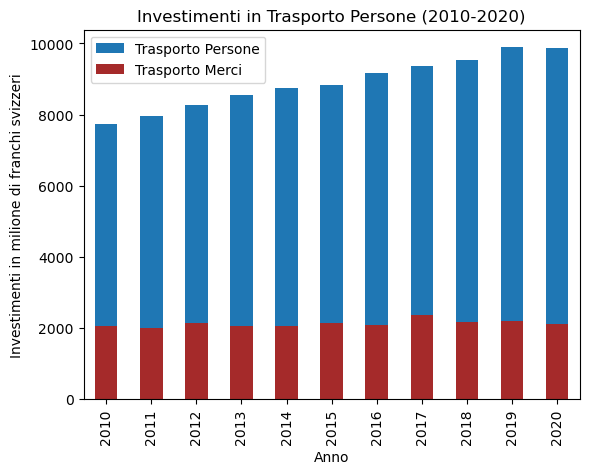

In [312]:
trasportiPersone.iloc[0, 1:].plot(kind='bar')
trasportiMerci.iloc[0, 1:].plot(kind='bar', color='brown')
plt.xlabel('Anno')
plt.ylabel('Investimenti in milione di franchi svizzeri')
plt.title('Investimenti in Trasporto Persone (2010-2020)')
plt.legend(['Trasporto Persone', 'Trasporto Merci'])
plt.show()

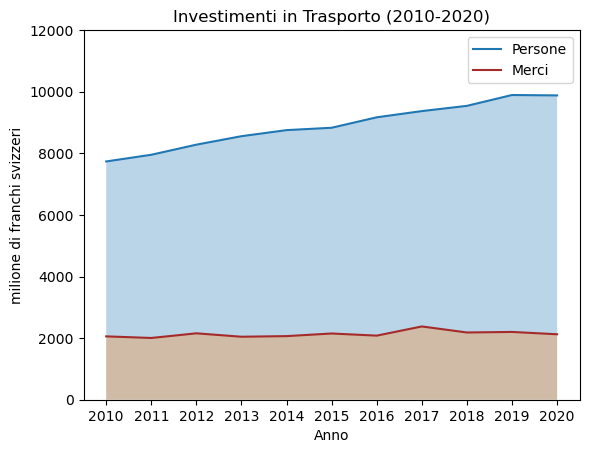

In [313]:
plt.plot(trasportiPersone.columns[1:], trasportiPersone.iloc[0, 1:], label='Persone')
plt.fill_between(trasportiPersone.columns[1:], trasportiPersone.iloc[0, 1:].astype(float), alpha=0.3)
#trasportiMerci.iloc[0, 1:].plot(marker='o', color='brown')
plt.plot(trasportiMerci.columns[1:], trasportiMerci.iloc[0, 1:], color='brown', label='Merci')
plt.fill_between(trasportiMerci.columns[1:], trasportiMerci.iloc[0, 1:].astype(float), alpha=0.3)
plt.xlabel('Anno')
plt.ylabel('milione di franchi svizzeri')
plt.title('Investimenti in Trasporto (2010-2020)')
plt.ylim(0,12000)
plt.legend()
plt.show()

Di quanto sono aumentati gli investimenti sul trasporto delle persone pubblico?

In [314]:
incrementoDecennale=trasportiPersone.iloc[0, 1:].values.max()-trasportiPersone.iloc[0, 1:].values.min()
incrementoDecennale

2157.0

In [315]:
incrementoDecennale/trasportiPersone.iloc[0, 1:].values.min()*100

27.882626680455015

2.157 Miliardi in 10 anni, che rappresenta un incremento del $$ +27.88 \% $$

In [316]:
invInfrastruttura=convertiRigaInIntero(investimentiPuliti,'Infrastruttura')

invMezzi=convertiRigaInIntero(investimentiPuliti,'Mezzi di trasporto')

C:\Users\aleme\AppData\Local\Temp\ipykernel_8444\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)
C:\Users\aleme\AppData\Local\Temp\ipykernel_8444\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


In [317]:
invInfrastrutturaInMiliardiFranchi=invInfrastruttura.iloc[0, 1:].values/1000
invInfrastrutturaInMiliardiFranchi

array([4.365, 4.527, 4.793, 4.802, 4.871, 5.043, 5.385, 5.509, 5.583,
       5.861, 5.745], dtype=object)

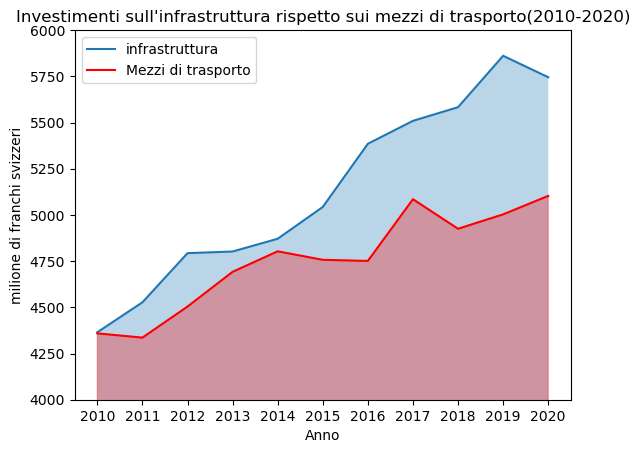

In [318]:
plt.plot(invInfrastruttura.columns[1:], invInfrastruttura.iloc[0, 1:], label='infrastruttura')
plt.plot(invMezzi.columns[1:], invMezzi.iloc[0, 1:], color='red',  label='Mezzi di trasporto')
plt.fill_between(invInfrastruttura.columns[1:], invInfrastruttura.iloc[0, 1:].astype(float), alpha=0.3)
plt.fill_between(invMezzi.columns[1:], invMezzi.iloc[0, 1:].astype(float), color='red',alpha=0.3)
plt.xlabel('Anno')
plt.ylabel('milione di franchi svizzeri')
plt.title('Investimenti sull\'infrastruttura rispetto sui mezzi di trasporto(2010-2020)')
plt.ylim(4000,6000)
plt.legend()
plt.show()

In [319]:
invInfrastruttura.columns[1:]

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [320]:
invInfrastruttura.iloc[0, 1:].index

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [321]:
investimentiItaliani=pd.read_csv('dataset/InvItaMezziTrasporto.csv',sep=',',decimal='.')
investimentiItaliani

,Regione,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Piemonte,2184865.2,2818137.4,2428355.7,2963767.6,2900019.2,3203400.9,2923131.0,2831031.7,3046192.2,...,2374446.1,2286586.5,2009243.6,2112479.4,1910793.5,1919954.1,2085201.2,1944648.3,2110696.1,2189214.5
1,Valle d'Aosta,66188.9,96965.7,131866.3,184283.2,180324.5,198745.5,168971.5,159655.1,161621.1,...,118291.1,92445.4,92018.6,101272.2,105594.5,102547.3,97368.1,88982.5,76061.9,95921.3
2,Liguria,1740907.4,2043224.0,1889241.0,1935658.7,1985731.3,1914879.2,1786075.1,1681659.8,1638457.7,...,1359364.8,1218131.0,1357698.9,1316155.4,1105423.1,1181875.0,1147836.3,1193063.5,1174840.9,1577502.1
3,Lombardia,4461185.2,5084574.6,4715455.4,4955532.4,5245139.4,5755981.7,6069792.5,6528122.5,6174904.0,...,6073047.2,6009082.9,6329971.5,6145688.1,6006381.8,6128007.7,5964439.0,5866326.5,5614861.7,6099575.3
4,Veneto,1937144.8,2391998.4,2591174.4,2863787.8,3111739.3,3071778.7,2975343.4,2949823.1,2899414.9,...,2570534.5,2303082.8,2235946.0,2165522.5,1945170.3,1899367.1,1910838.5,1954812.1,2029169.9,2053476.8
5,Emilia Romagna,2365137.1,2309064.5,2378673.1,2494064.4,2659653.7,2640327.0,2420403.5,2229428.5,2222725.9,...,2052494.4,1953676.7,2001824.8,1841720.5,1651184.3,1740840.4,1761642.4,1835146.9,1822867.5,2009596.4
6,Toscana,2464919.4,2458568.6,2555353.7,3039549.6,3171311.3,3278845.4,2953883.7,2741309.5,2871366.4,...,2339024.5,1834589.5,2086885.4,2012580.5,1749317.7,1976528.0,1797316.3,1899107.5,1785542.6,1885663.5
7,Lazio,4992230.2,9999766.1,5603825.9,5813206.9,6013375.1,6304475.2,7019431.1,8678087.5,5522299.3,...,5733300.7,5381626.1,4724525.4,4793536.8,4038144.7,4169668.0,3765016.2,3722589.5,3788567.4,4172584.6
8,Campania,3614325.0,3734461.6,3112324.3,3606263.0,4031198.0,3668283.3,3727558.8,3944532.5,3600619.0,...,2968305.8,2573522.0,2526542.2,2469547.1,2303293.0,2032784.9,2128515.3,1967423.9,2095817.2,2134624.3
9,Sicilia,1765142.2,2132522.3,1668032.4,1667580.5,1703036.1,1850077.1,1953773.3,1999536.1,1752828.2,...,1515702.9,1368457.5,1292527.1,1466723.6,1295753.7,1281599.4,1446730.7,1383560.9,1405710.1,1692610.6


In [322]:
investimentiItalia=investimentiItaliani[investimentiItaliani['Regione']=='Italia']
investimentiItalia

,Regione,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
15,Italia,32122985.0,40464816.7,33377099.6,36386874.5,37809254.0,39005697.1,39175536.5,40734609.5,36945296.1,...,33328160.8,30695249.8,30178308.1,29914921.7,27290554.5,27584535.8,27659993.9,26996924.4,27332346.9,29658188.8


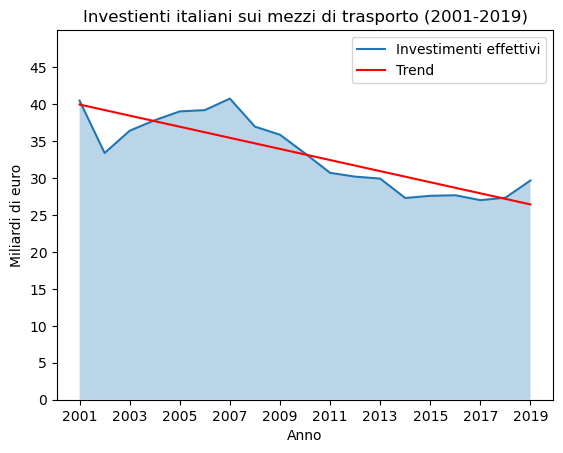

In [323]:
maxInv=50000000

# Extract x (years) and y (values) data
x = investimentiItalia.columns[2:].astype(int)
y = investimentiItalia.iloc[0, 2:].astype(float)

# Perform linear regression
coefficients = np.polyfit(x, y, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = linear_fit(x_fit)

plt.plot(x, y,label='Investimenti effettivi')
plt.fill_between(x, y, alpha=0.3)

plt.plot(x_fit, y_fit, '-', label='Trend' ,color='red')

plt.xticks(np.arange(x.min(), x.max()+1, step=2))
plt.yticks(np.arange(0, maxInv, step=5000000))


def scale_y(value, tick_number):
    return f'{value * 1e-6:.0f}'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(scale_y))

plt.xlabel('Anno')
plt.ylabel('Miliardi di euro')
plt.title('Investienti italiani sui mezzi di trasporto (2001-2019)')
plt.legend()
plt.ylim(0,maxInv)
plt.show()

Compariamo ora alla svizzera 

In [324]:
invTrasportoSvizzera=convertiRigaInIntero(investimentiPuliti,'Costi del trasporto ferroviario')
invTrasportoSvizzera.iloc[0, 2:].astype(float)

C:\Users\aleme\AppData\Local\Temp\ipykernel_8444\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


2011     9958.0
2012    10437.0
2013    10600.0
2014    10818.0
2015    10979.0
2016    11250.0
2017    11750.0
2018    11724.0
2019    12095.0
2020    12004.0
Name: 0, dtype: float64

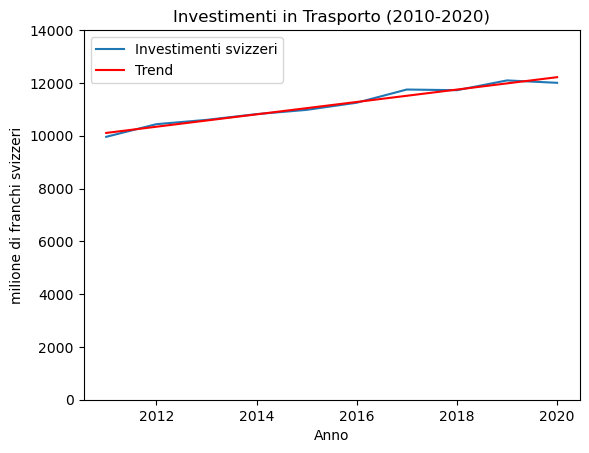

In [325]:

x = invTrasportoSvizzera.columns[2:].astype(int)
y = invTrasportoSvizzera.iloc[0, 2:].astype(float)

coefficients = np.polyfit(x, y, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_ch = np.linspace(x.min(), x.max(), 100)
y_fit_ch = linear_fit(x_fit_ch)


plt.plot(x, y,label='Investimenti svizzeri')
plt.plot(x_fit_ch, y_fit_ch, '-', label='Trend' ,color='red')

plt.xlabel('Anno')
plt.ylabel('milione di franchi svizzeri')
plt.title('Investimenti in Trasporto (2010-2020)')
plt.ylim(0,14000)
plt.legend()
plt.show()

Ora compariamo anche la lombardia

In [326]:
invLombardia=investimentiItaliani[investimentiItaliani['Regione']=='Lombardia']
x_lombardia = invLombardia.columns[2:].astype(int)
y_lombardia_inflazione = invLombardia.iloc[0, 2:].astype(float)/1000

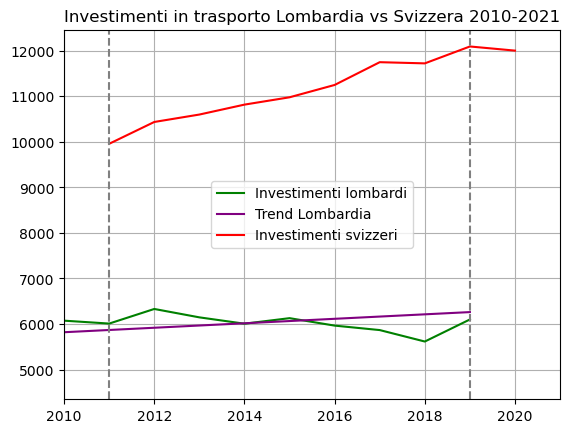

In [327]:
plt.plot(x_lombardia, y_lombardia_inflazione, label='Investimenti lombardi', color='green')

coefficients = np.polyfit(x_lombardia, y_lombardia_inflazione, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_lomb = np.linspace(x_lombardia.min(), x_lombardia.max(), 100)
y_fit_lomb = linear_fit(x_fit_lomb)
plt.plot(x_fit_lomb, y_fit_lomb, '-', label='Trend Lombardia' ,color='purple')
plt.grid(True)

x_ch = invTrasportoSvizzera.columns[2:].astype(int)
y_ch = invTrasportoSvizzera.iloc[0, 2:].astype(float)
plt.plot(x_ch, y_ch, label='Investimenti svizzeri', color='red')
plt.xlim(2010,2021)
plt.title('Investimenti in trasporto Lombardia vs Svizzera 2010-2021')
plt.axvline(x=2011, color='gray', linestyle='--')
plt.axvline(x=2019, color='gray', linestyle='--')
plt.legend()
plt.show()

A questo punto compariamo sia italia che lombardia alla svizzera

In [328]:
#Conversione in euro
y_fit_ita=y_fit/ 1000 
y_fit_ch=y_fit_ch*1.08

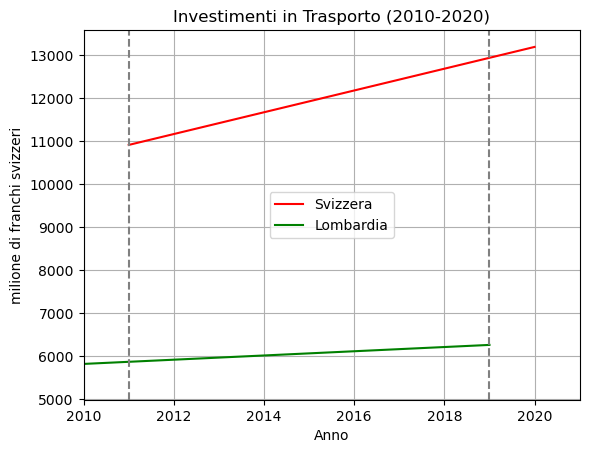

In [329]:
plt.plot(x_fit_ch, y_fit_ch, '-', label='Svizzera' ,color='red')
plt.plot(x_fit_lomb, y_fit_lomb, '-', label='Lombardia' ,color='green')
plt.xlabel('Anno')
plt.ylabel('milione di franchi svizzeri')
plt.title('Investimenti in Trasporto (2010-2020)')
plt.xlim(2010,2021)
plt.grid(True)
plt.axvline(x=2011, color='gray', linestyle='--')
plt.axvline(x=2019, color='gray', linestyle='--')
plt.legend()
plt.show()

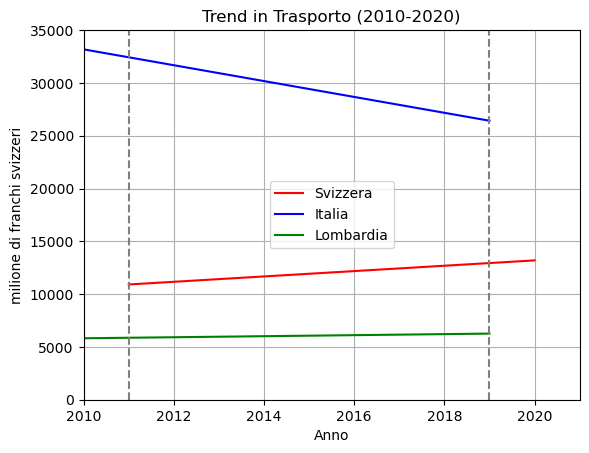

In [330]:
plt.plot(x_fit_ch, y_fit_ch, '-', label='Svizzera' ,color='red')
plt.plot(x_fit, y_fit_ita, '-', label='Italia' ,color='blue')
plt.plot(x_fit_lomb, y_fit_lomb, '-', label='Lombardia' ,color='green')
plt.xlabel('Anno')
plt.ylabel('milione di franchi svizzeri')
plt.title('Trend in Trasporto (2010-2020)')
plt.xlim(2010,2021)
plt.ylim(0,35000)

plt.grid(True)
plt.axvline(x=2011, color='gray', linestyle='--')
plt.axvline(x=2019, color='gray', linestyle='--')
plt.legend()
plt.show()

Questo non guarda neanche l'inflazione!


In [331]:
inflazioneIta=pd.read_csv('dataset/InflazioneItalia.csv',sep=';',decimal=',')
inflazioneIta

,anno,inflazione
0,2021,1.9
1,2020,-0.2
2,2019,0.6
3,2018,1.2
4,2017,1.2
5,2016,-0.1
6,2015,0.1
7,2014,0.2
8,2013,1.2
9,2012,3.0


In [332]:
inflazioneCH=pd.read_csv('dataset/InflazioneSvizzera.csv',sep=';',decimal=',')
inflazioneCH

,anno,inflazione
0,2021,1.53
1,2020,-0.81
2,2019,0.16
3,2018,0.69
4,2017,0.84
5,2016,-0.01
6,2015,-1.31
7,2014,-0.33
8,2013,0.07
9,2012,-0.43


Farò un bel grafico che compara l'inflazione tra i due paesi, per poi aggiustare i grafici in base all'inflazione

In [333]:
years = inflazioneCH['anno'].iloc[::-1].values
inflazioneSvizzera = inflazioneCH['inflazione'].iloc[::-1].values
inflazioneItalia = inflazioneIta['inflazione'].iloc[::-1].values

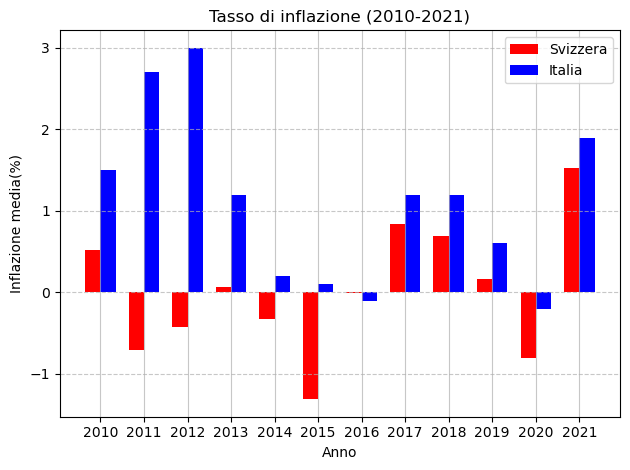

In [334]:
bar_width = 0.35

indices = np.arange(len(years))

plt.bar(indices, inflazioneSvizzera, width=bar_width, label='Svizzera', color='red')
plt.bar(indices + bar_width, inflazioneItalia, width=bar_width, label='Italia', color='blue')

plt.xlabel('Anno')
plt.ylabel('Inflazione media(%)')
plt.title('Tasso di inflazione (2010-2021)')
plt.xticks(indices + bar_width / 2, years)

plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.show()

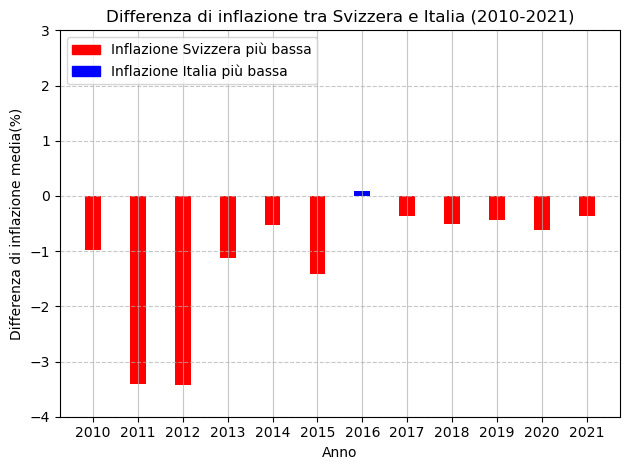

In [335]:
difference = inflazioneSvizzera - inflazioneItalia
colors = ['red' if a < b else 'blue' for a, b in zip(inflazioneSvizzera, inflazioneItalia)]
plt.bar(indices + bar_width / 2, difference, width=bar_width, color=colors)

plt.xlabel('Anno')
plt.ylabel('Differenza di inflazione media(%)')
plt.title('Differenza di inflazione tra Svizzera e Italia (2010-2021)')
plt.xticks(indices + bar_width / 2, years)

# Create custom legend entries
switzerland_patch = mpatches.Patch(color='red', label='Inflazione Svizzera più bassa')
italy_patch = mpatches.Patch(color='blue', label='Inflazione Italia più bassa')

# Add the custom legend
plt.legend(handles=[switzerland_patch, italy_patch], loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.ylim(-4,3)
plt.tight_layout()
plt.show()

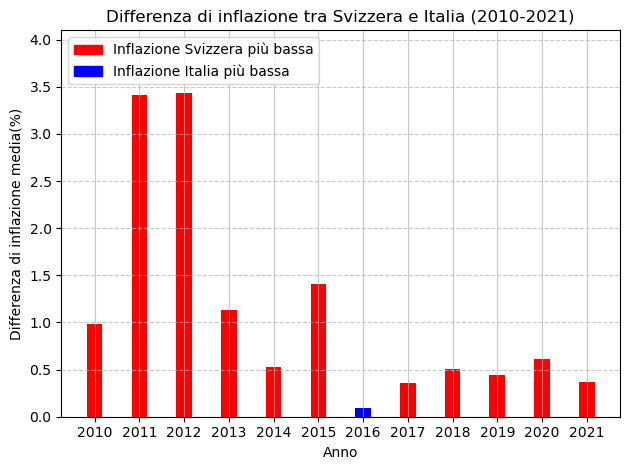

In [336]:
difference = inflazioneSvizzera - inflazioneItalia
colors = ['red' if a < b else 'blue' for a, b in zip(inflazioneSvizzera, inflazioneItalia)]
plt.bar(indices + bar_width / 2, abs(difference), width=bar_width, color=colors)

plt.xlabel('Anno')
plt.ylabel('Differenza di inflazione media(%)')
plt.title('Differenza di inflazione tra Svizzera e Italia (2010-2021)')
plt.xticks(indices + bar_width / 2, years)

switzerland_patch = mpatches.Patch(color='red', label='Inflazione Svizzera più bassa')
italy_patch = mpatches.Patch(color='blue', label='Inflazione Italia più bassa')

plt.legend(handles=[switzerland_patch, italy_patch], loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.ylim(0,4.1)
plt.tight_layout()
plt.show()

Spese aggiornate per inflazione rispetto al 2010

In [337]:
invLombardia.iloc[:, 1:] = invLombardia.iloc[:, 1:].apply(lambda x: x / 1000)
invLombardia

,Regione,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,Lombardia,4461.1852,5084.5746,4715.4554,4955.5324,5245.1394,5755.9817,6069.7925,6528.1225,6174.904,...,6073.0472,6009.0829,6329.9715,6145.6881,6006.3818,6128.0077,5964.439,5866.3265,5614.8617,6099.5753


In [338]:
invSvizzera=investimentiPuliti[investimentiPuliti['tipo di investimento']=="Costi del trasporto ferroviario"]
invSvizzera.rename(columns={'tipo di investimento': 'Regione'}, inplace=True)
invSvizzera=investimentiPuliti[investimentiPuliti['tipo di investimento']=="Costi del trasporto ferroviario"]
invSvizzera.rename(columns={'tipo di investimento': 'Regione'}, inplace=True)
inflazioneCH = inflazioneCH.sort_values(by='anno')

inflazioneCH['cumulative_factor'] = (1 + inflazioneCH['inflazione'] / 100).cumprod()
inflazioneCH

C:\Users\aleme\AppData\Local\Temp\ipykernel_8444\3040689189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invSvizzera.rename(columns={'tipo di investimento': 'Regione'}, inplace=True)
C:\Users\aleme\AppData\Local\Temp\ipykernel_8444\3040689189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invSvizzera.rename(columns={'tipo di investimento': 'Regione'}, inplace=True)


,anno,inflazione,cumulative_factor
11,2010,0.52,1.005200
10,2011,-0.71,0.998063
9,2012,-0.43,0.993771
8,2013,0.07,0.994467
7,2014,-0.33,0.991185
6,2015,-1.31,0.978201
5,2016,-0.01,0.978103
4,2017,0.84,0.986319
3,2018,0.69,0.993125
2,2019,0.16,0.994714


In [339]:
inflazioneIta = inflazioneIta.sort_values(by='anno')

# Compute cumulative adjustment factor
inflazioneIta['cumulative_factor'] = (1 + inflazioneIta['inflazione'] / 100).cumprod()
inflazioneIta

,anno,inflazione,cumulative_factor
11,2010,1.5,1.015000
10,2011,2.7,1.042405
9,2012,3.0,1.073677
8,2013,1.2,1.086561
7,2014,0.2,1.088734
6,2015,0.1,1.089823
5,2016,-0.1,1.088733
4,2017,1.2,1.101798
3,2018,1.2,1.115020
2,2019,0.6,1.121710


C:\Users\aleme\AppData\Local\Temp\ipykernel_8444\1944844845.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invSvizzera.rename(columns={'tipo di investimento': 'Regione'}, inplace=True)


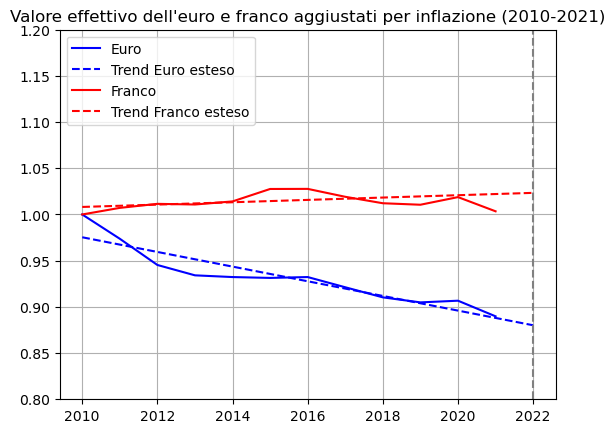

In [340]:
latest_year = inflazioneIta['anno'].max()
reference_year = latest_year - 11

reference_factor = inflazioneIta.loc[inflazioneIta['anno'] == reference_year, 'cumulative_factor'].values[0]
inflazioneIta['value_compared_to_10_years_ago'] = reference_factor / inflazioneIta['cumulative_factor']
plt.plot(inflazioneIta['anno'], inflazioneIta['value_compared_to_10_years_ago'], label='Euro', color='blue')


invSvizzera=investimentiPuliti[investimentiPuliti['tipo di investimento']=="Costi del trasporto ferroviario"]
invSvizzera.rename(columns={'tipo di investimento': 'Regione'}, inplace=True)
inflazioneCH = inflazioneCH.sort_values(by='anno')
reference_factor_sv = inflazioneCH.loc[inflazioneCH['anno'] == reference_year, 'cumulative_factor'].values[0]
inflazioneCH['value_compared_to_10_years_ago'] = reference_factor_sv / inflazioneCH['cumulative_factor']
inflazioneCH['cumulative_factor'] = (1 + inflazioneCH['inflazione'] / 100).cumprod()

year_extended = 2022

trend_it_2022 = intercept_it + slope_it * year_extended
inflazioneIta_extended_years = inflazioneIta['anno'].tolist() + [year_extended]
trend_it_extended = trend_it.tolist() + [trend_it_2022]

trend_ch_2022 = intercept_ch + slope_ch * year_extended
inflazioneCH_extended_years = inflazioneCH['anno'].tolist() + [year_extended]
trend_ch_extended = trend_ch.tolist() + [trend_ch_2022]

plt.plot(inflazioneIta_extended_years, trend_it_extended, label='Trend Euro esteso', color='blue', linestyle='--')
plt.plot(inflazioneCH['anno'], inflazioneCH['value_compared_to_10_years_ago'], label='Franco', color='red')

plt.plot(inflazioneCH_extended_years, trend_ch_extended, label='Trend Franco esteso', color='red', linestyle='--')


plt.ylim(0.8,1.2)
plt.grid(True)
plt.title("Valore effettivo dell'euro e franco aggiustati per inflazione (2010-2021)")

#il 2022, il franco equivale all'euro nello scambio
#al momento sembra che l'euro sia risalito rispetto all'euro
plt.axvline(x=2022, color='gray', linestyle='--')
plt.legend()
plt.show()

In [341]:
lombardiaInflazionata = invLombardia.melt(id_vars=['Regione'], var_name='anno', value_name='valore')
lombardiaInflazionata['anno'] = lombardiaInflazionata['anno'].astype(int)
lombardiaInflazionata = lombardiaInflazionata.merge(inflazioneIta[['anno', 'cumulative_factor']], on='anno')
lombardiaInflazionata['adjusted_valore'] = lombardiaInflazionata['valore'] / lombardiaInflazionata['cumulative_factor']
lombardiaInflazionata = lombardiaInflazionata.pivot(index='Regione', columns='anno', values='adjusted_valore').reset_index()
x_lombardia_infl = lombardiaInflazionata.columns[2:].astype(int)
y_lombardia_infl = lombardiaInflazionata.iloc[0, 2:].astype(float)

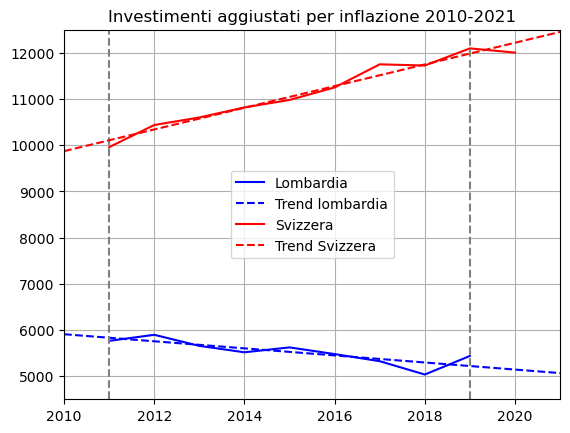

In [342]:
plt.plot(x_lombardia_infl, y_lombardia_infl, label='Lombardia', color='blue')

coefficients = np.polyfit(x_lombardia_infl, y_lombardia_infl, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_lomb = np.linspace(2010, 2022, 100)
y_fit_lomb = linear_fit(x_fit_lomb)
plt.plot(x_fit_lomb, y_fit_lomb, '--', label='Trend lombardia' ,color='blue')
plt.grid(True)


x_ch = invTrasportoSvizzera.columns[2:].astype(int)
y_ch = invTrasportoSvizzera.iloc[0, 2:].astype(float)
plt.plot(x_ch, y_ch, label='Svizzera', color='red')
plt.title('Investimenti in trasporto Lombardia vs Svizzera 2010-2021')
plt.axvline(x=2011, color='gray', linestyle='--')
plt.axvline(x=2019, color='gray', linestyle='--')

coefficients = np.polyfit(x_ch, y_ch, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit_sv = np.linspace(2010, 2022, 100)
y_fit_sv = linear_fit(x_fit_sv)
plt.plot(x_fit_sv, y_fit_sv, '--', label='Trend Svizzera' ,color='red')
plt.grid(True)

plt.title('Investimenti aggiustati per inflazione 2010-2021')
plt.legend()
plt.xlim(2010,2021)
plt.ylim(4500,12500)
plt.show()


Ok ma in svizzera non sono più ricchi? si

Proviamo ad aggiustare per la ricchezza dei popoli per farsi un'idea

Secondo istat e ente statistico svizzero i rispettivi pil ed numero di abitanti sono:

In [432]:
pilItalia=pd.read_csv('dataset/pilItalia.csv',sep=',', engine='python',decimal='.')
pilItalia


,regione,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Italia,988243.2,1045872.7,1092357.3,1138856.1,1175149.5,1241512.9,1304136.8,1350258.9,1394693.2,...,1612751.2,1627405.6,1655355.0,1695786.8,1736592.7,1771391.2,1796648.5,1661239.8,1822344.5,1946479.1
1,Lombardia,209519.3,222274.5,231131.8,241568.6,246998.1,260303.9,273903.9,285668.4,295182.6,...,349743.4,357543.4,364242.1,375270.3,385126.4,395485.4,399793.2,375034.6,416318.7,442297.9
2,Lazio,111132.8,116420.1,122243.0,128488.0,131662.1,138315.5,146562.8,154685.8,159352.2,...,184343.9,184506.7,185735.6,193646.3,196416.1,199279.5,201986.6,185966.7,198292.8,212588.5


In [433]:
pilIta=pilItalia[pilItalia['regione']=='Italia']
pilLombardia=pilItalia[pilItalia['regione']=='Lombardia']
pilLazio=pilItalia[pilItalia['regione']=='Lazio']

years = pilIta.columns[1:].astype(int)
gdp_italia = pilIta.iloc[0, 1:].values.astype(float)
gdp_lombardia = pilLombardia.iloc[0, 1:].values.astype(float)
gdp_lombardia


array([209519.3, 222274.5, 231131.8, 241568.6, 246998.1, 260303.9,
       273903.9, 285668.4, 295182.6, 305277.1, 313741.1, 323476.1,
       337053. , 350382.8, 334174.9, 350131. , 358527.2, 352679.3,
       349743.4, 357543.4, 364242.1, 375270.3, 385126.4, 395485.4,
       399793.2, 375034.6, 416318.7, 442297.9])

In [434]:
pilSvizzera=pd.read_csv('dataset/pilSvizzera.csv',sep=',', engine='python',decimal='.')
pilSvizzera=pilSvizzera[pilSvizzera['Classificazione']=="Prodotto interno lordo"]
pilSvizzera.drop(columns=['Code','Classificazione'], inplace=True)
gdp_svizzera=pilSvizzera.iloc[0, 1:].values.astype(float)
gdp_svizzera=gdp_svizzera*1000
gdp_svizzera

array([420368., 427826., 439955., 447466., 471540., 483637., 482077.,
       487607., 502266., 520848., 553722., 589085., 614408., 603039.,
       624545., 635739., 643646., 654612., 665618., 668006., 677848.,
       684558., 709522., 716879., 696620., 743330., 781460.])

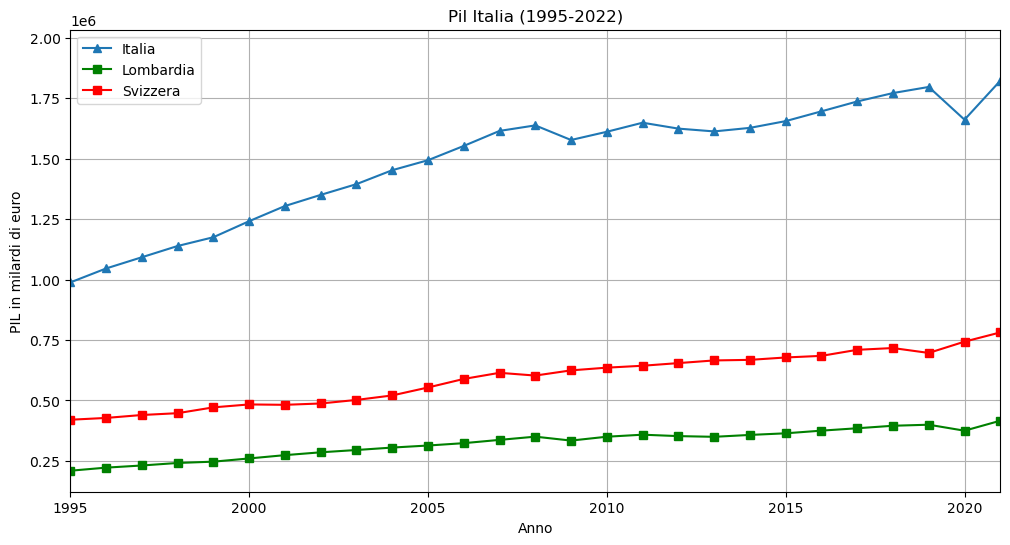

In [442]:
plt.figure(figsize=(12, 6))
plt.plot(years, gdp_italia, label='Italia',marker='^')
plt.plot(years, gdp_lombardia, label='Lombardia',marker='s', color='green')
plt.plot(years[:27], gdp_svizzera, label='Svizzera',marker='s', color='red')

plt.xlabel('Anno')
plt.ylabel('PIL in milardi di euro')
plt.title('Pil Italia (1995-2022)')
plt.legend()
plt.xlim(1995,2021)
plt.grid(True)
plt.show()

In [461]:
gpdProCapitaIta_dollari=pd.read_csv('dataset/gpdProCapitaIta.csv',sep=',', engine='python',decimal='.')
gpdProCapitaCh_dollari=pd.read_csv('dataset/gdpProCapitaSvizzera.csv',sep=',', engine='python',decimal='.')

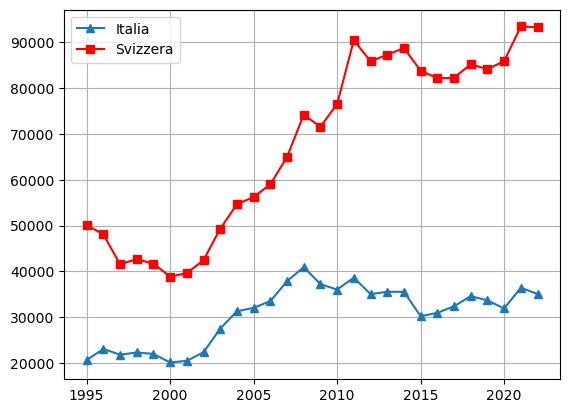

In [463]:
plt.plot(gpdProCapitaIta_dollari['anno'], gpdProCapitaIta_dollari['gdpCapita'], label='Italia',marker='^')
plt.plot(gpdProCapitaCh_dollari['anno'], gpdProCapitaCh_dollari['gdpCapita'], label='Svizzera',marker='s', color='red')
plt.grid(True)
plt.legend()
plt.show()

Quanto è piu ricco uno svizzero, quanto investono in mezzi paragonato ad esso